In [1]:
# Import the modules
import starss_kinetics_difusion_solution as kd
import numpy as np
import matplotlib.pyplot as plt
from codetiming import Timer
import spherical as sf

# Make angles
lmax = 12
omega = kd.make_angles(lmax)

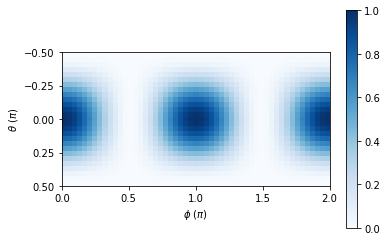

In [2]:
# Make first function f(theta,phi)
# fa = 1-np.sin(omega[0])**2
fa = np.cos(omega[1])**2 * np.cos(omega[0])**2
fgrid, fc, fcilm = kd.make_grid(fa, lmax)
kd.plot_proj(fgrid)

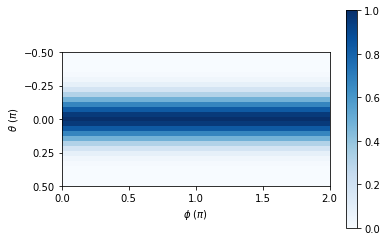

In [3]:
# Make second function g(theta,phi)
ga = (np.cos(omega[0])**6)

ggrid, gc, gcilm = kd.make_grid(ga, lmax)
kd.plot_proj(ggrid)


Text(0.5, 1.0, 'Coefficients lm')

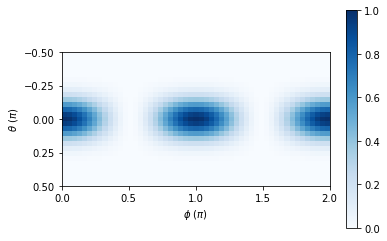

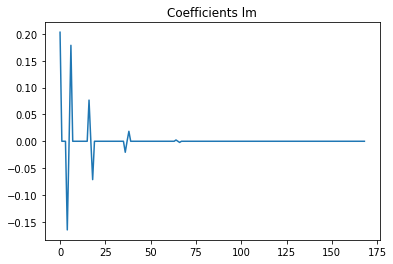

In [4]:
# Make product f*g
fggrid, fgc, fgcilm = kd.make_grid(fa*ga, lmax)
kd.plot_proj(fggrid)
plt.figure()
plt.plot(fgc)
plt.title('Coefficients lm')

In [5]:
# # Compute product using CG
# l, m = kd.quantum_numbers(lmax)
# t=Timer()
# t.start()
# cgp = kd.clebsch_gordan_prod_3darray(l, m)
# t.stop()

# fprod = kd.kinetic_prod_block(fc, cgp)
# fprodg_c = fprod.dot(gc)
# fprodg_grid = kd.vec2grid(fprodg_c)
# kd.plot_proj(fprodg_grid, clims=[0, 1])
# plt.figure()
# plt.plot(fprodg_c)
# plt.title('Coefficients lm')

Elapsed time: 0.0883 seconds


Text(0.5, 1.0, 'Coefficients lm')

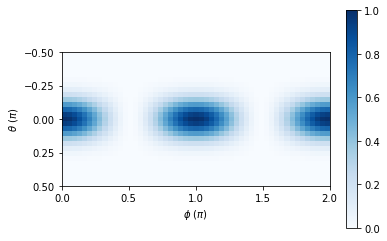

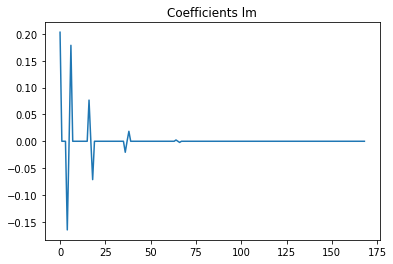

In [6]:
# Compute product using w3j
l, m = kd.quantum_numbers(lmax)
t=Timer()
t.start()
w3jp = kd.wigner_3j_prod_3darray(l, m)
t.stop()

fprod3j = kd.kinetic_prod_block(fc, w3jp)
fprod3jg_c = fprod3j.dot(gc)
fprod3jg_grid = kd.vec2grid(fprod3jg_c)
kd.plot_proj(fprod3jg_grid, clims=[0, 1])
plt.figure()
plt.plot(fprod3jg_c)
plt.title('Coefficients lm')

In [7]:
# Check computations using cg and w3j
np.allclose(fprod3jg_c, fgc)

True

In [8]:
# plt.imshow(cgp[3,:,:])

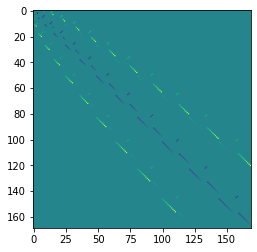

In [9]:
plt.imshow(w3jp[8,:,:])

The product function with CG and computed directly should be the same.

In [10]:
# Standard deviation of the difference
np.sqrt(np.mean((fggrid.data-fprod3jg_grid.data)**2))

3.157735977995888e-16

Text(0.5, 0, 'Coefficient index')

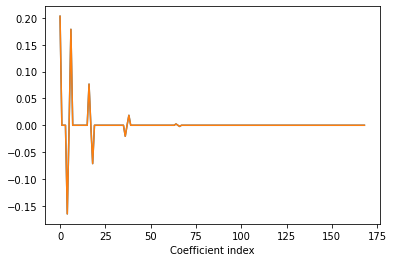

In [11]:
# Plot of the coefficients of the expanded array from direct multiplication and w3j matrix multiplicaiton
plt.plot(fprod3jg_c)
plt.plot(fgc)
plt.xlabel('Coefficient index')

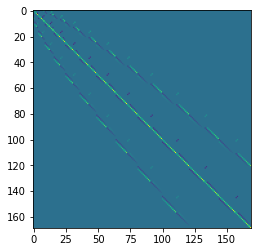

In [12]:
# Plot the multiplication matrix
plt.imshow(fprod3j)